In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
result_oriented = pd.read_csv('result_oriented_runs.csv')
result_oriented['Converged Steps'] = pd.to_numeric(result_oriented['Converged Steps'], errors='coerce')

expectation_oriented = pd.read_csv('expectation_oriented_runs.csv')
expectation_oriented['Converged Steps'] = pd.to_numeric(expectation_oriented['Converged Steps'], errors='coerce')

combined_data = pd.concat([result_oriented, expectation_oriented])
anchor_order = ['Fresh Start', '25k', '40k', '45k', '50k', '55k', '60k', '75k', '100k', '350k']
combined_data['Anchor-Policy'] = pd.Categorical(combined_data['Anchor-Policy'], categories=anchor_order, ordered=True)

# combined_data.to_csv('combined_strategy_runs.csv', index=False)
combined_csv = pd.read_csv('combined_strategy_runs.csv')

combined_csv.style.format({
}).set_properties(**{
    'text-align': 'center',
    'border': '1px solid black'
}).set_table_styles([
    dict(selector='th', props=[('text-align', 'center')]),
    dict(selector='th', props=[('background-color', '#f7f7f9')]),
    dict(selector='td', props=[('padding', '6px')])
])

combined_csv



,Task,Anchor-Policy,Strategy,Selected Demo States,Max Success Rate,Converged Steps,Notes
0,Left,Fresh Start,Result-Oriented,"0,6,7,8,7",0.80,400000.0,The success rate gradually increases from near...
1,Left,25k,Result-Oriented,"1,5,7,9,7",0.85,500000.0,The success rate reaches around 0.4 by 150k st...
2,Left,40k,Result-Oriented,"8,2,8,9,3",0.60,525000.0,"The success rate shows a slower rise, reaching..."
3,Left,45k,Result-Oriented,"0,6,0,8,7",0.80,250000.0,"The success rate shows consistent growth, reac..."
4,Left,50k,Result-Oriented,"6,2,2,4,3",0.40,500000.0,"The success rate rises very slowly, only reach..."
5,Left,55k,Result-Oriented,"0,6,7,8,7",0.80,400000.0,"The success rate rises consistently, reaching ..."
6,Left,60k,Result-Oriented,"4,7,3,7,5",0.60,500000.0,"The success rate improves gradually, reaching ..."
7,Left,75k,Result-Oriented,"2,4,5,1,6",0.60,300000.0,The success rate climbs steadily to 0.4 by app...
8,Left,100k,Result-Oriented,"8,2,8,3,4",0.65,570000.0,The success rate grows steadily to 0.3–0.4 by ...
9,Left,350k,Result-Oriented,"0,6,6,6,5",0.70,530000.0,Success rate starts improving only after 400k ...


c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


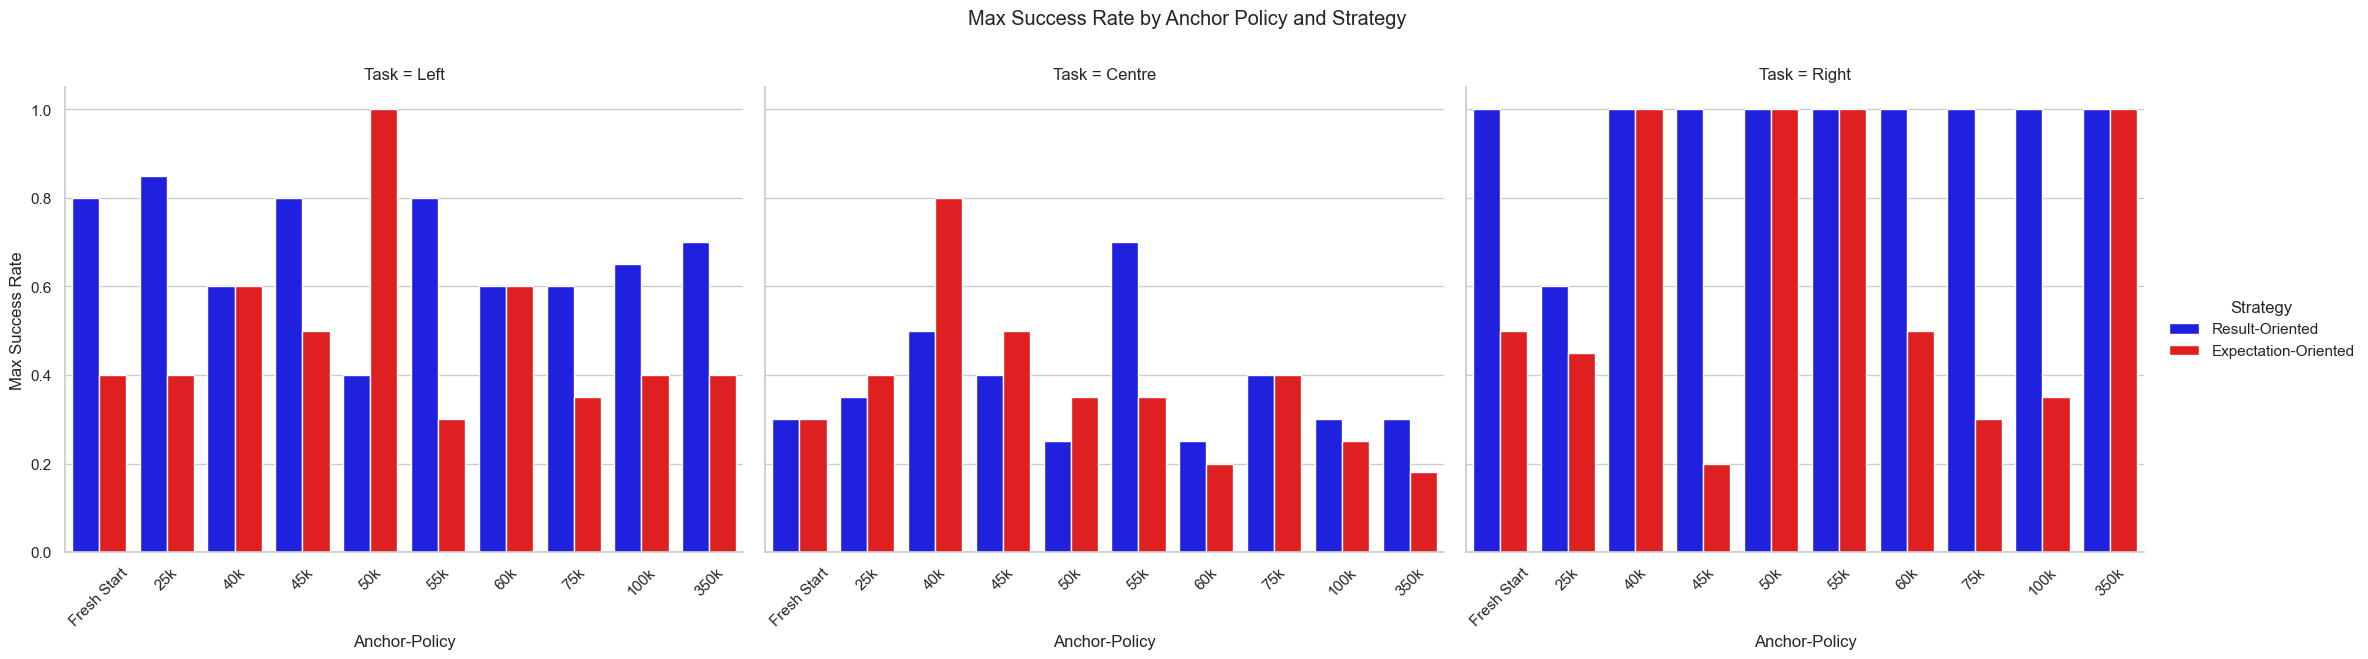

In [3]:
palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

sns.set(style="whitegrid")
g = sns.catplot(
    data=combined_csv,
    x='Anchor-Policy',
    y='Max Success Rate',
    hue='Strategy',
    col='Task',
    kind='bar',
    height=6,
    aspect=1.2,
    palette=palette,
    legend_out=True,
)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Max Success Rate by Anchor Policy and Strategy')
plt.show()


In [4]:
# Descriptive statistics for each Task and Strategy combination
desc_stats = combined_csv.groupby(['Task', 'Strategy'])['Max Success Rate'].agg(['mean', 'std', 'count']).reset_index()


tasks = combined_csv['Task'].unique()
results = {}


for task in tasks:
    result_oriented = combined_csv[(combined_csv['Task'] == task) & (combined_csv['Strategy'] == 'Result-Oriented')]['Max Success Rate']
    expectation_oriented = combined_csv[(combined_csv['Task'] == task) & (combined_csv['Strategy'] == 'Expectation-Oriented')]['Max Success Rate']
    
    # T-test
    t_stat, p_value = ttest_ind(result_oriented, expectation_oriented, equal_var=False)
    results[task] = {'t-stat': t_stat, 'p-value': p_value, 
                     'mean_result_oriented': result_oriented.mean(),
                     'mean_expectation_oriented': expectation_oriented.mean()}

print(f"Left task: {results['Left']}")
print(f"Right task: {results['Right']}")
print(f"Center task: {results['Centre']}")




Left task: {'t-stat': 2.3811848767777994, 'p-value': 0.030171023951761886, 'mean_result_oriented': 0.68, 'mean_expectation_oriented': 0.4950000000000001}
Right task: {'t-stat': 2.945072380678212, 'p-value': 0.012685010405737144, 'mean_result_oriented': 0.96, 'mean_expectation_oriented': 0.6299999999999999}
Center task: {'t-stat': 0.027979402306349647, 'p-value': 0.9780063411399951, 'mean_result_oriented': 0.37499999999999994, 'mean_expectation_oriented': 0.373}


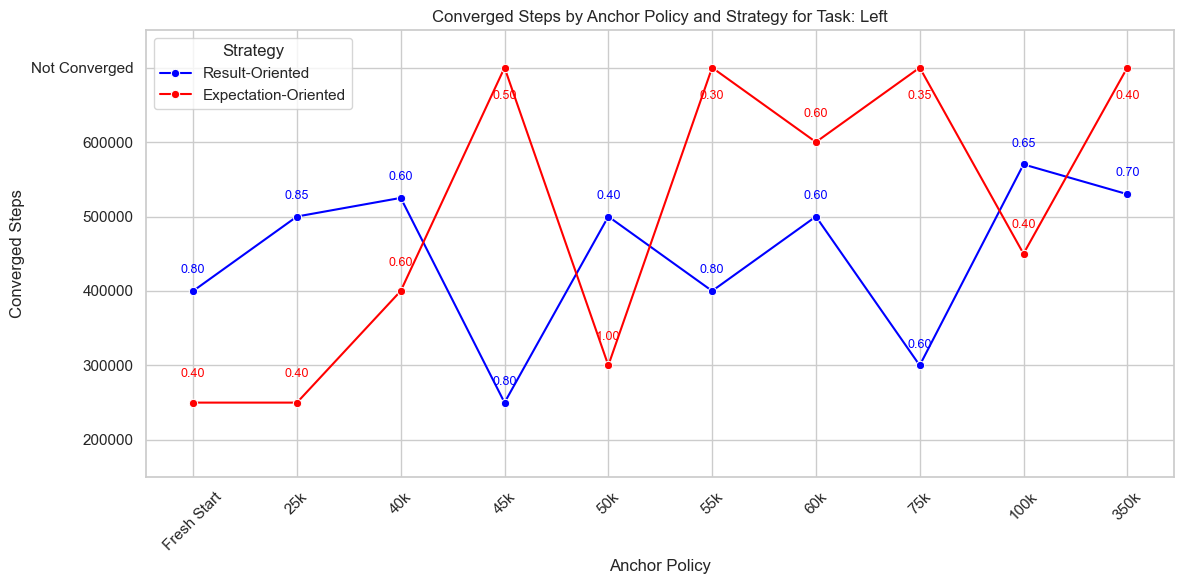

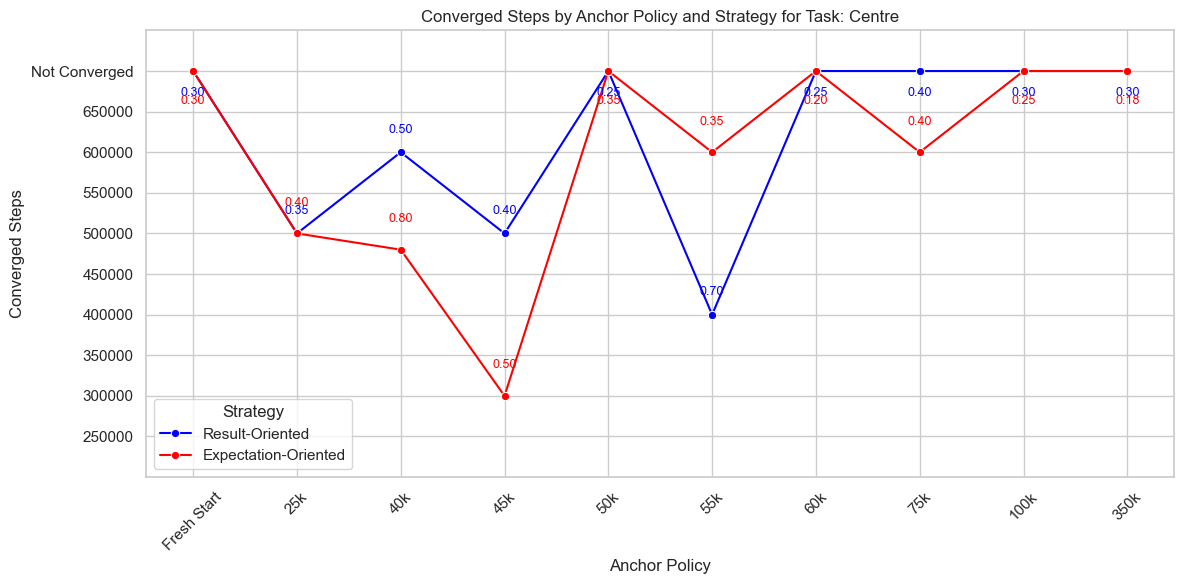

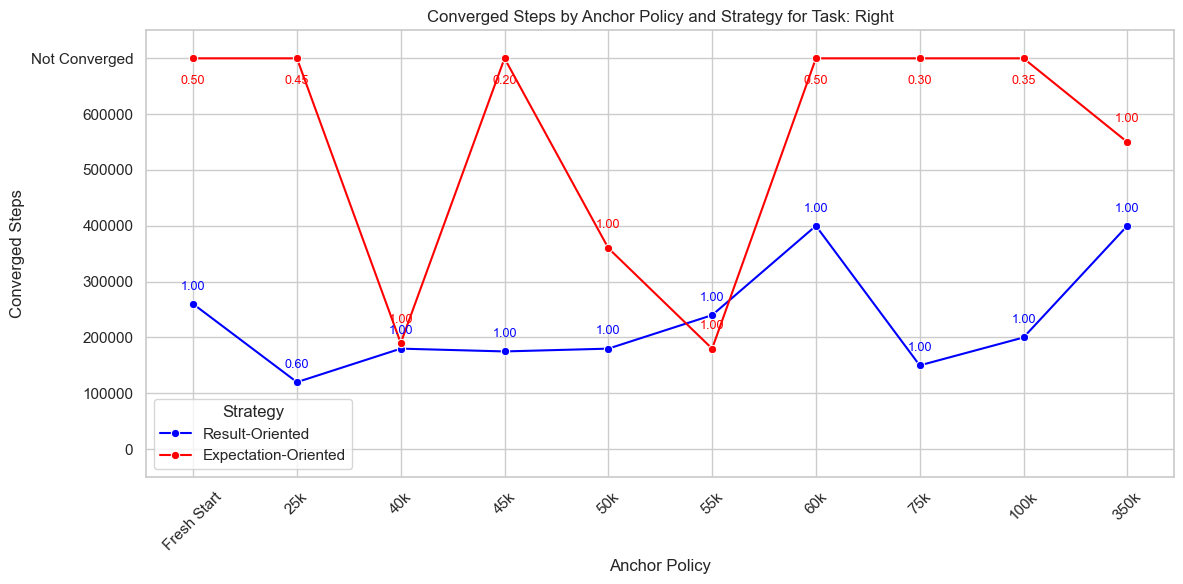

In [5]:
combined_csv['Converged Steps'] = combined_csv['Converged Steps'].replace('No Convergence', np.nan).astype(float)
combined_csv['Max Success Rate'] = pd.to_numeric(combined_csv['Max Success Rate'], errors='coerce')

combined_csv['Anchor-Policy'] = pd.Categorical(combined_csv['Anchor-Policy'], categories=anchor_order, ordered=True)

palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}


not_converged_value = 700000 
combined_csv['Converged Steps Filled'] = combined_csv['Converged Steps'].fillna(not_converged_value)

tasks = combined_csv['Task'].unique()
for task in tasks:
    plt.figure(figsize=(12, 6))
    task_data = combined_csv[combined_csv['Task'] == task]

    for idx, strategy in enumerate(task_data['Strategy'].unique()):
        subset = task_data[task_data['Strategy'] == strategy]
        color = palette[strategy]

        sns.lineplot(
            data=subset,
            x='Anchor-Policy',
            y='Converged Steps Filled',
            marker='o',
            label=strategy,
            color=color,
        )

        
        for i, (x, y, msr) in enumerate(zip(subset['Anchor-Policy'], subset['Converged Steps Filled'], subset['Max Success Rate'])):
            if y == not_converged_value:
                plt.text(
                    x,
                    y - 20000 - (10000 * idx),
                    f"{msr:.2f}" if not np.isnan(msr) else "",
                    color=color,
                    ha='center',
                    va='top',
                    fontsize=9,
                )
            else:
                plt.text(
                    x,
                    y + 20000 + (10000 * idx),  
                    f"{msr:.2f}" if not np.isnan(msr) else "",
                    color=color,
                    ha='center',
                    va='bottom',
                    fontsize=9,
                )


    plt.title(f'Converged Steps by Anchor Policy and Strategy for Task: {task}')
    plt.xlabel('Anchor Policy')
    plt.ylabel('Converged Steps')
    yticks = list(plt.yticks()[0]) 
    yticks = [tick for tick in yticks if tick < not_converged_value]  
    plt.yticks(yticks + [not_converged_value], list(map(int, yticks)) + ['Not Converged'])

    plt.ylim(min(yticks) - 50000, not_converged_value + 50000)  
    plt.legend(title='Strategy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Pearson Correlation: -0.52, p-value: 0.0007
Spearman Correlation: -0.53, p-value: 0.0005


c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


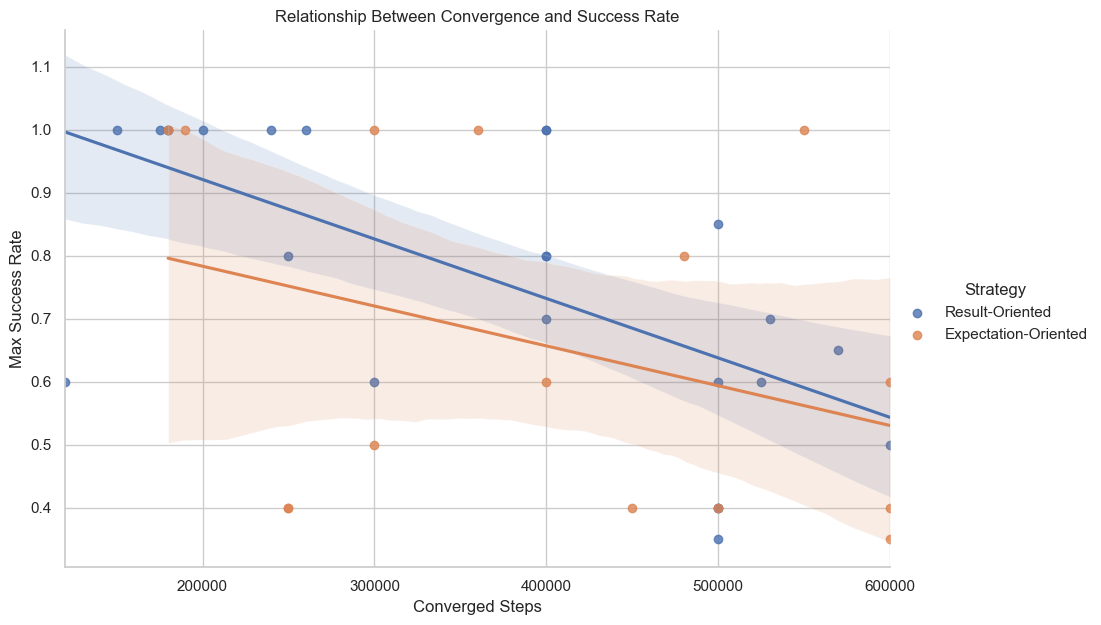

In [6]:

filtered_data = combined_csv.dropna(subset=['Converged Steps', 'Max Success Rate'])

pearson_corr, pearson_pval = pearsonr(filtered_data['Converged Steps'], filtered_data['Max Success Rate'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_pval:.4f}")

spearman_corr, spearman_pval = spearmanr(filtered_data['Converged Steps'], filtered_data['Max Success Rate'])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_pval:.4f}")

sns.lmplot(
    data=combined_csv,
    x='Converged Steps',
    y='Max Success Rate',
    hue='Strategy',
    ci=95,
    height=6,
    aspect=1.5,
)
plt.title("Relationship Between Convergence and Success Rate")
plt.show()

In [7]:
def process_selected_demo_states(x):
    if isinstance(x, str):
        return [int(s.strip()) for s in x.split(',')]
    elif isinstance(x, list):
        return [int(s) for s in x]
    else:
        return x

combined_csv['Selected Demo States'] = combined_csv['Selected Demo States'].apply(process_selected_demo_states)


combined_csv['Num Unique States'] = combined_csv['Selected Demo States'].apply(lambda x: len(set(x)))


combined_csv['Average State'] = combined_csv['Selected Demo States'].apply(lambda x: np.mean(x))


corr_features = ['Max Success Rate', 'Converged Steps', 'Num Unique States', 'Average State']
corr_data = combined_csv[corr_features].dropna()

corr_matrix = corr_data.corr()
print(corr_matrix)

                   Max Success Rate  Converged Steps  Num Unique States  \
Max Success Rate           1.000000        -0.521373          -0.179172   
Converged Steps           -0.521373         1.000000           0.135596   
Num Unique States         -0.179172         0.135596           1.000000   
Average State              0.351976        -0.088593          -0.006415   

                   Average State  
Max Success Rate        0.351976  
Converged Steps        -0.088593  
Num Unique States      -0.006415  
Average State           1.000000  


Slope (Coefficient): 0.08850684363334721
Intercept: 0.26540024885939417
R-squared: 0.06811408285401122


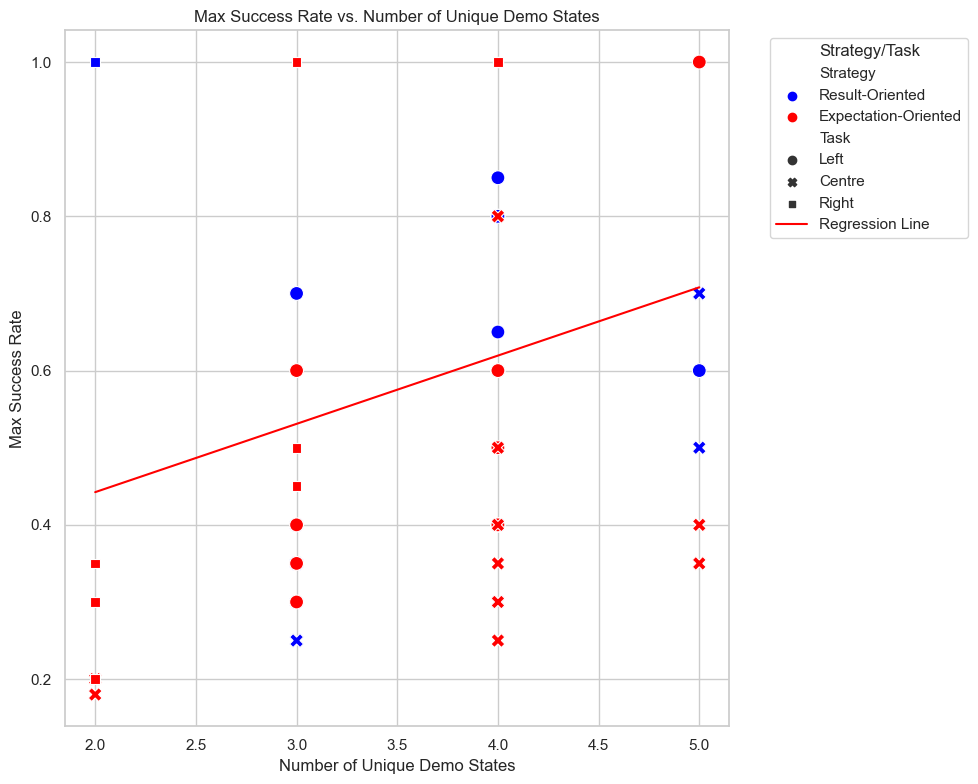

In [8]:

X = combined_csv['Num Unique States'].values.reshape(-1, 1)  
y = combined_csv['Max Success Rate'].values 


model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r2}")


sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=combined_csv,
    x='Num Unique States',
    y='Max Success Rate',
    hue='Strategy',
    style='Task',
    palette={'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'},
    s=100,  # Marker size
)

X_vals = np.linspace(combined_csv['Num Unique States'].min(), combined_csv['Num Unique States'].max(), 100).reshape(-1, 1)
y_vals = model.predict(X_vals)
plt.plot(X_vals, y_vals, color='red', label='Regression Line')

plt.title('Max Success Rate vs. Number of Unique Demo States')
plt.xlabel('Number of Unique Demo States')
plt.ylabel('Max Success Rate')

plt.legend(title='Strategy/Task', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

c:\Users\Konstantin\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


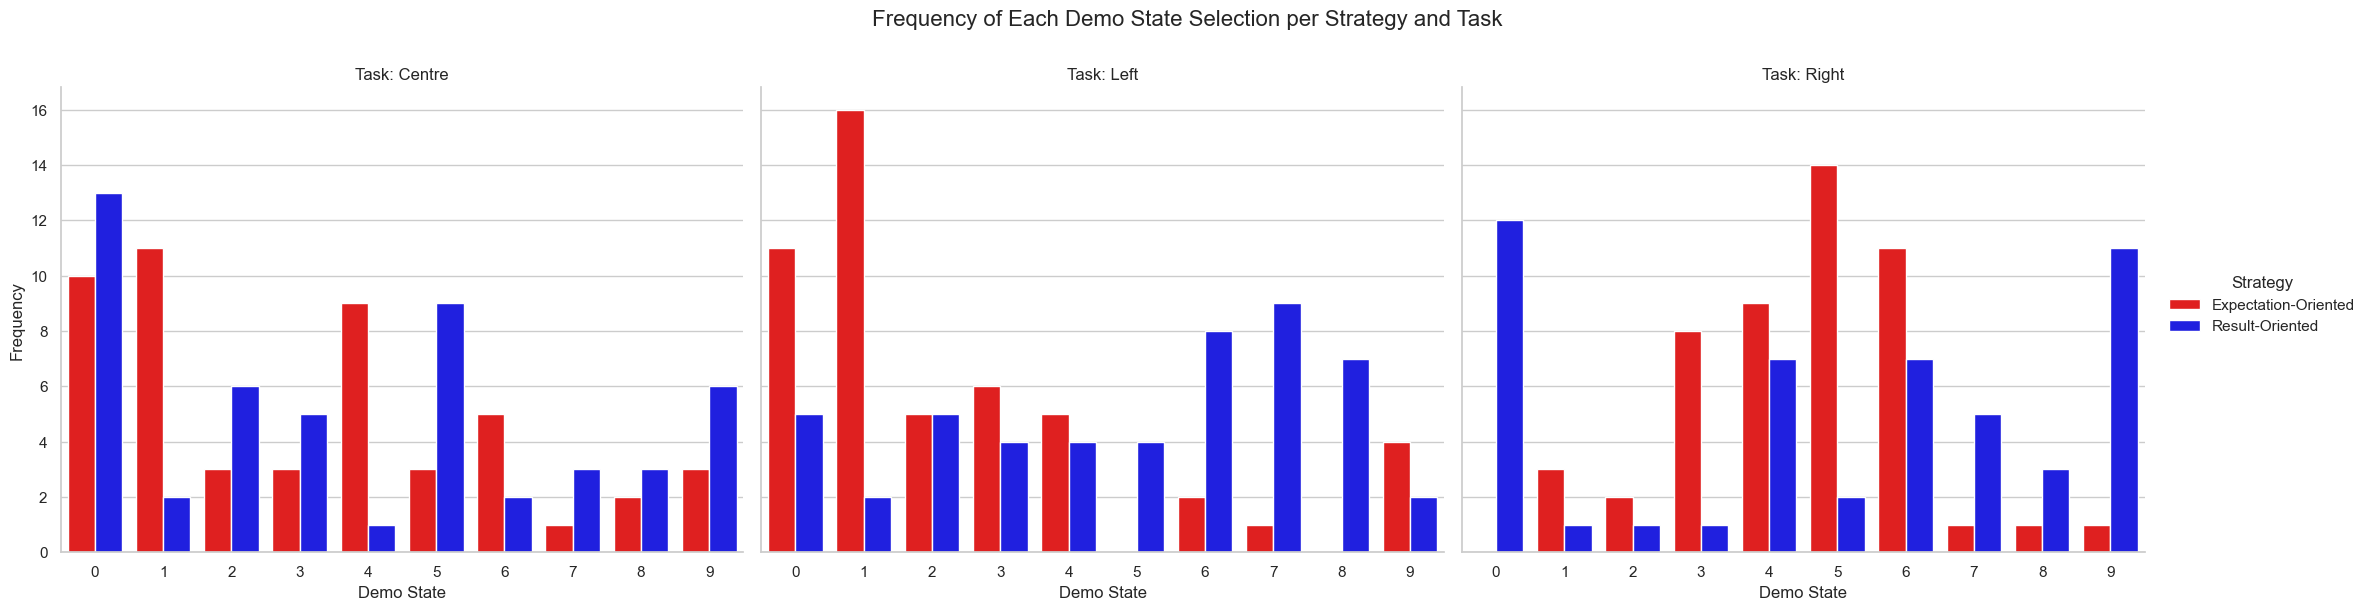

In [9]:

exploded_data = combined_csv.explode('Selected Demo States')
exploded_data['Selected Demo States'] = exploded_data['Selected Demo States'].astype(int)

state_counts = exploded_data.groupby(['Strategy', 'Task', 'Selected Demo States']).size().reset_index(name='Count')

state_counts['Selected Demo States'] = state_counts['Selected Demo States'].astype(int)
state_counts['Selected Demo States'] = state_counts['Selected Demo States'].astype('category')
state_counts['Selected Demo States'] = state_counts['Selected Demo States'].cat.set_categories(list(range(10)))

palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

g = sns.catplot(
    data=state_counts,
    x='Selected Demo States',
    y='Count',
    hue='Strategy',
    col='Task',
    kind='bar',
    palette=palette,
    height=6,
    aspect=1.2
)
g.set_titles('Task: {col_name}')
g.set_axis_labels('Demo State', 'Frequency')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Frequency of Each Demo State Selection per Strategy and Task', fontsize=16)
plt.show()

In [10]:
close_to_goal_states = {
    'Left': [0, 1, 2],
    'Centre': [4, 5, 6],
    'Right': [7, 8, 9]
}

def process_demo_states(row):
    task = row['Task']
    selected_demo_states_str = row['Selected Demo States']
    selected_demo_states = [int(state.strip()) for state in selected_demo_states_str.split(',')]
    spread = max(selected_demo_states) - min(selected_demo_states)
    close_states = close_to_goal_states.get(task, [])
    num_close_to_goal = sum(1 for state in selected_demo_states if state in close_states)
    return pd.Series({'Spread of Demonstrations': spread, 'Number of Demos Close to Goal': num_close_to_goal})

combined_data[['Spread of Demonstrations', 'Number of Demos Close to Goal']] = combined_data.apply(process_demo_states, axis=1)


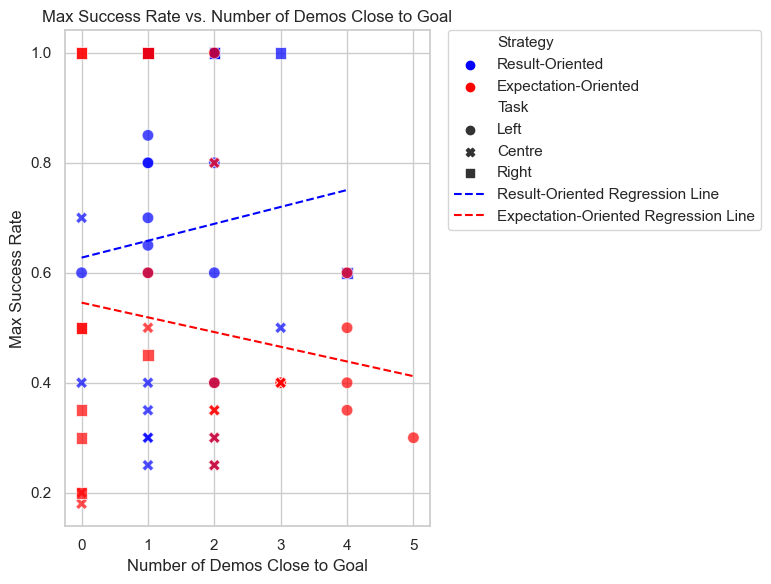

In [11]:
strategy_palette = {'Result-Oriented': 'blue', 'Expectation-Oriented': 'red'}

task_markers = {'Left': 'o', 'Centre': 'X', 'Right': 's'}

plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=combined_data,
    x='Number of Demos Close to Goal',
    y='Max Success Rate',
    hue='Strategy',
    style='Task',
    palette=strategy_palette,
    markers=task_markers,
    s=70,
    alpha=0.7
)

for strategy, color in strategy_palette.items():
    strategy_data = combined_data[combined_data['Strategy'] == strategy]
    X = strategy_data[['Number of Demos Close to Goal']]
    y = strategy_data['Max Success Rate']
    if len(X) > 1: 
        model = LinearRegression()
        model.fit(X, y)
        X_vals = np.linspace(X['Number of Demos Close to Goal'].min(), X['Number of Demos Close to Goal'].max(), 100).reshape(-1,1)
        y_vals = model.predict(X_vals)
        plt.plot(X_vals, y_vals, color=color, linestyle='--', label=f'{strategy} Regression Line')

plt.title('Max Success Rate vs. Number of Demos Close to Goal')
plt.xlabel('Number of Demos Close to Goal')
plt.ylabel('Max Success Rate')

handles, labels = ax.get_legend_handles_labels()



from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

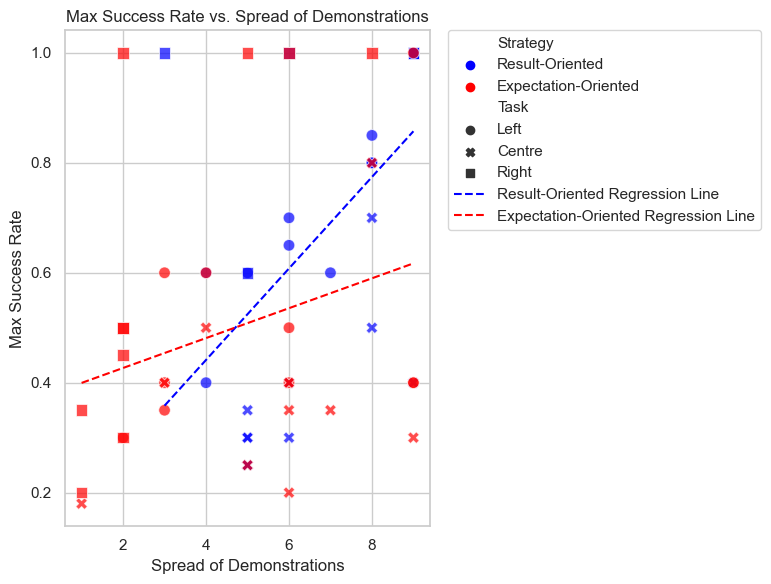

In [12]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(
    data=combined_data,
    x='Spread of Demonstrations',
    y='Max Success Rate',
    hue='Strategy',
    style='Task',
    palette=strategy_palette,
    markers=task_markers,
    s=70,
    alpha=0.7
)

for strategy, color in strategy_palette.items():
    strategy_data = combined_data[combined_data['Strategy'] == strategy]
    X = strategy_data[['Spread of Demonstrations']]
    y = strategy_data['Max Success Rate']
    if len(X) > 1:
        model = LinearRegression()
        model.fit(X, y)
        X_vals = np.linspace(X['Spread of Demonstrations'].min(), X['Spread of Demonstrations'].max(), 100).reshape(-1,1)
        y_vals = model.predict(X_vals)
        plt.plot(X_vals, y_vals, color=color, linestyle='--', label=f'{strategy} Regression Line')

plt.title('Max Success Rate vs. Spread of Demonstrations')
plt.xlabel('Spread of Demonstrations')
plt.ylabel('Max Success Rate')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()